# Denoising AutoEncoder (DAE)

### Step 1 - Import libraries

In [15]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Model # for creating a Neural Network Autoencoder model
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense, LeakyReLU, BatchNormalization # for adding layers to AE model
from tensorflow.keras.utils import plot_model # for plotting model diagram


# Data manipulation
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version


# Visualization
import matplotlib 
import matplotlib.pyplot as plt # for plotting model loss
print('matplotlib: %s' % matplotlib.__version__) # print version
import graphviz # for showing model diagram
print('graphviz: %s' % graphviz.__version__) # print version


# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
#print(main_dir)

Tensorflow/Keras: 2.7.0
numpy: 1.21.4
matplotlib: 3.5.1
graphviz: 0.19.1


### Step 2 - Load MNIST digit data

Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


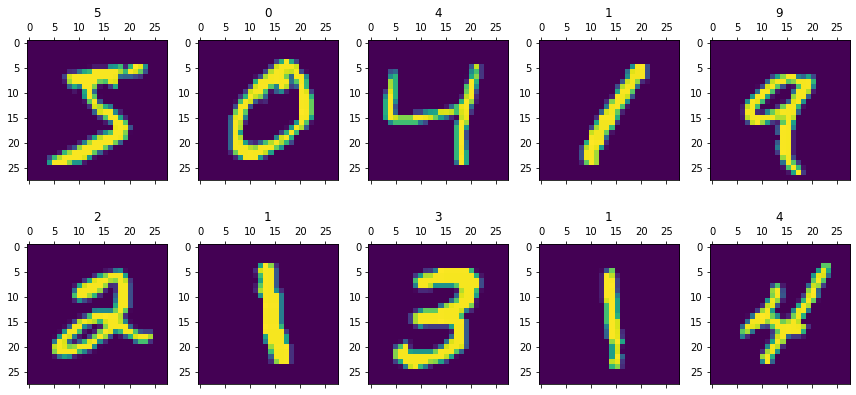

In [46]:
# Load digits data 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Normalize (divide by 255) input data
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Display images of the first 10 digits in the training set and their true lables
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show() 

##### Add noise to original images and display 10 of them

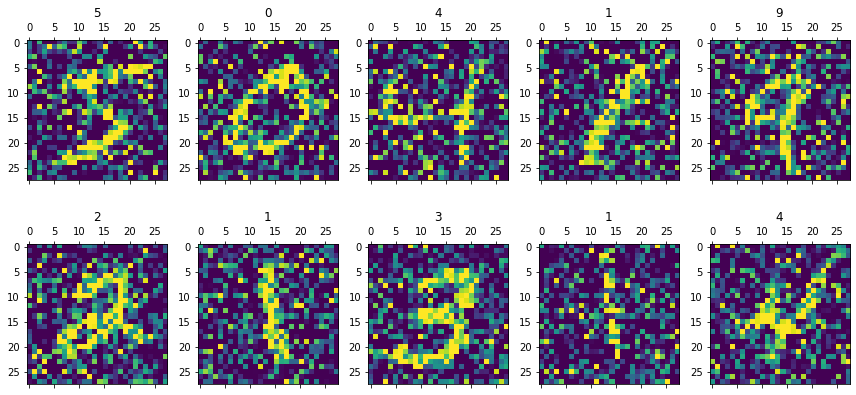

In [47]:
# Specify how much noise to add
level_of_noise=0.5

# Add random noise based on sampling from Gaussian distribution
X_train_noisy = X_train + level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# Enforce min-max boundaries so it does not go beyond [0,1] range
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display images of the first 10 digits in the noisy training data
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train_noisy[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show() 

In [48]:
# Reshape input data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train_noisy = X_train_noisy.reshape(60000, 784)
X_test_noisy = X_test_noisy.reshape(10000, 784)

# Print shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

print("New shape of X_train_noisy: ", X_train_noisy.shape)
print("New shape of X_test_noisy: ", X_test_noisy.shape)

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)
New shape of X_train_noisy:  (60000, 784)
New shape of X_test_noisy:  (10000, 784)


### Step 3 - Build a Denoising Autoencoder model

Model: "Denoising-Autoencoder-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-Layer (InputLayer)    [(None, 784)]             0         
                                                                 
 Encoder-Layer (Dense)       (None, 784)               615440    
                                                                 
 Encoder-Layer-Normalization  (None, 784)              3136      
  (BatchNormalization)                                           
                                                                 
 Encoder-Layer-Activation (L  (None, 784)              0         
 eakyReLU)                                                       
                                                                 
 Middle-Hidden-Layer (Dense)  (None, 784)              615440    
                                                                 
 Decoder-Layer (Dense)       (None, 784

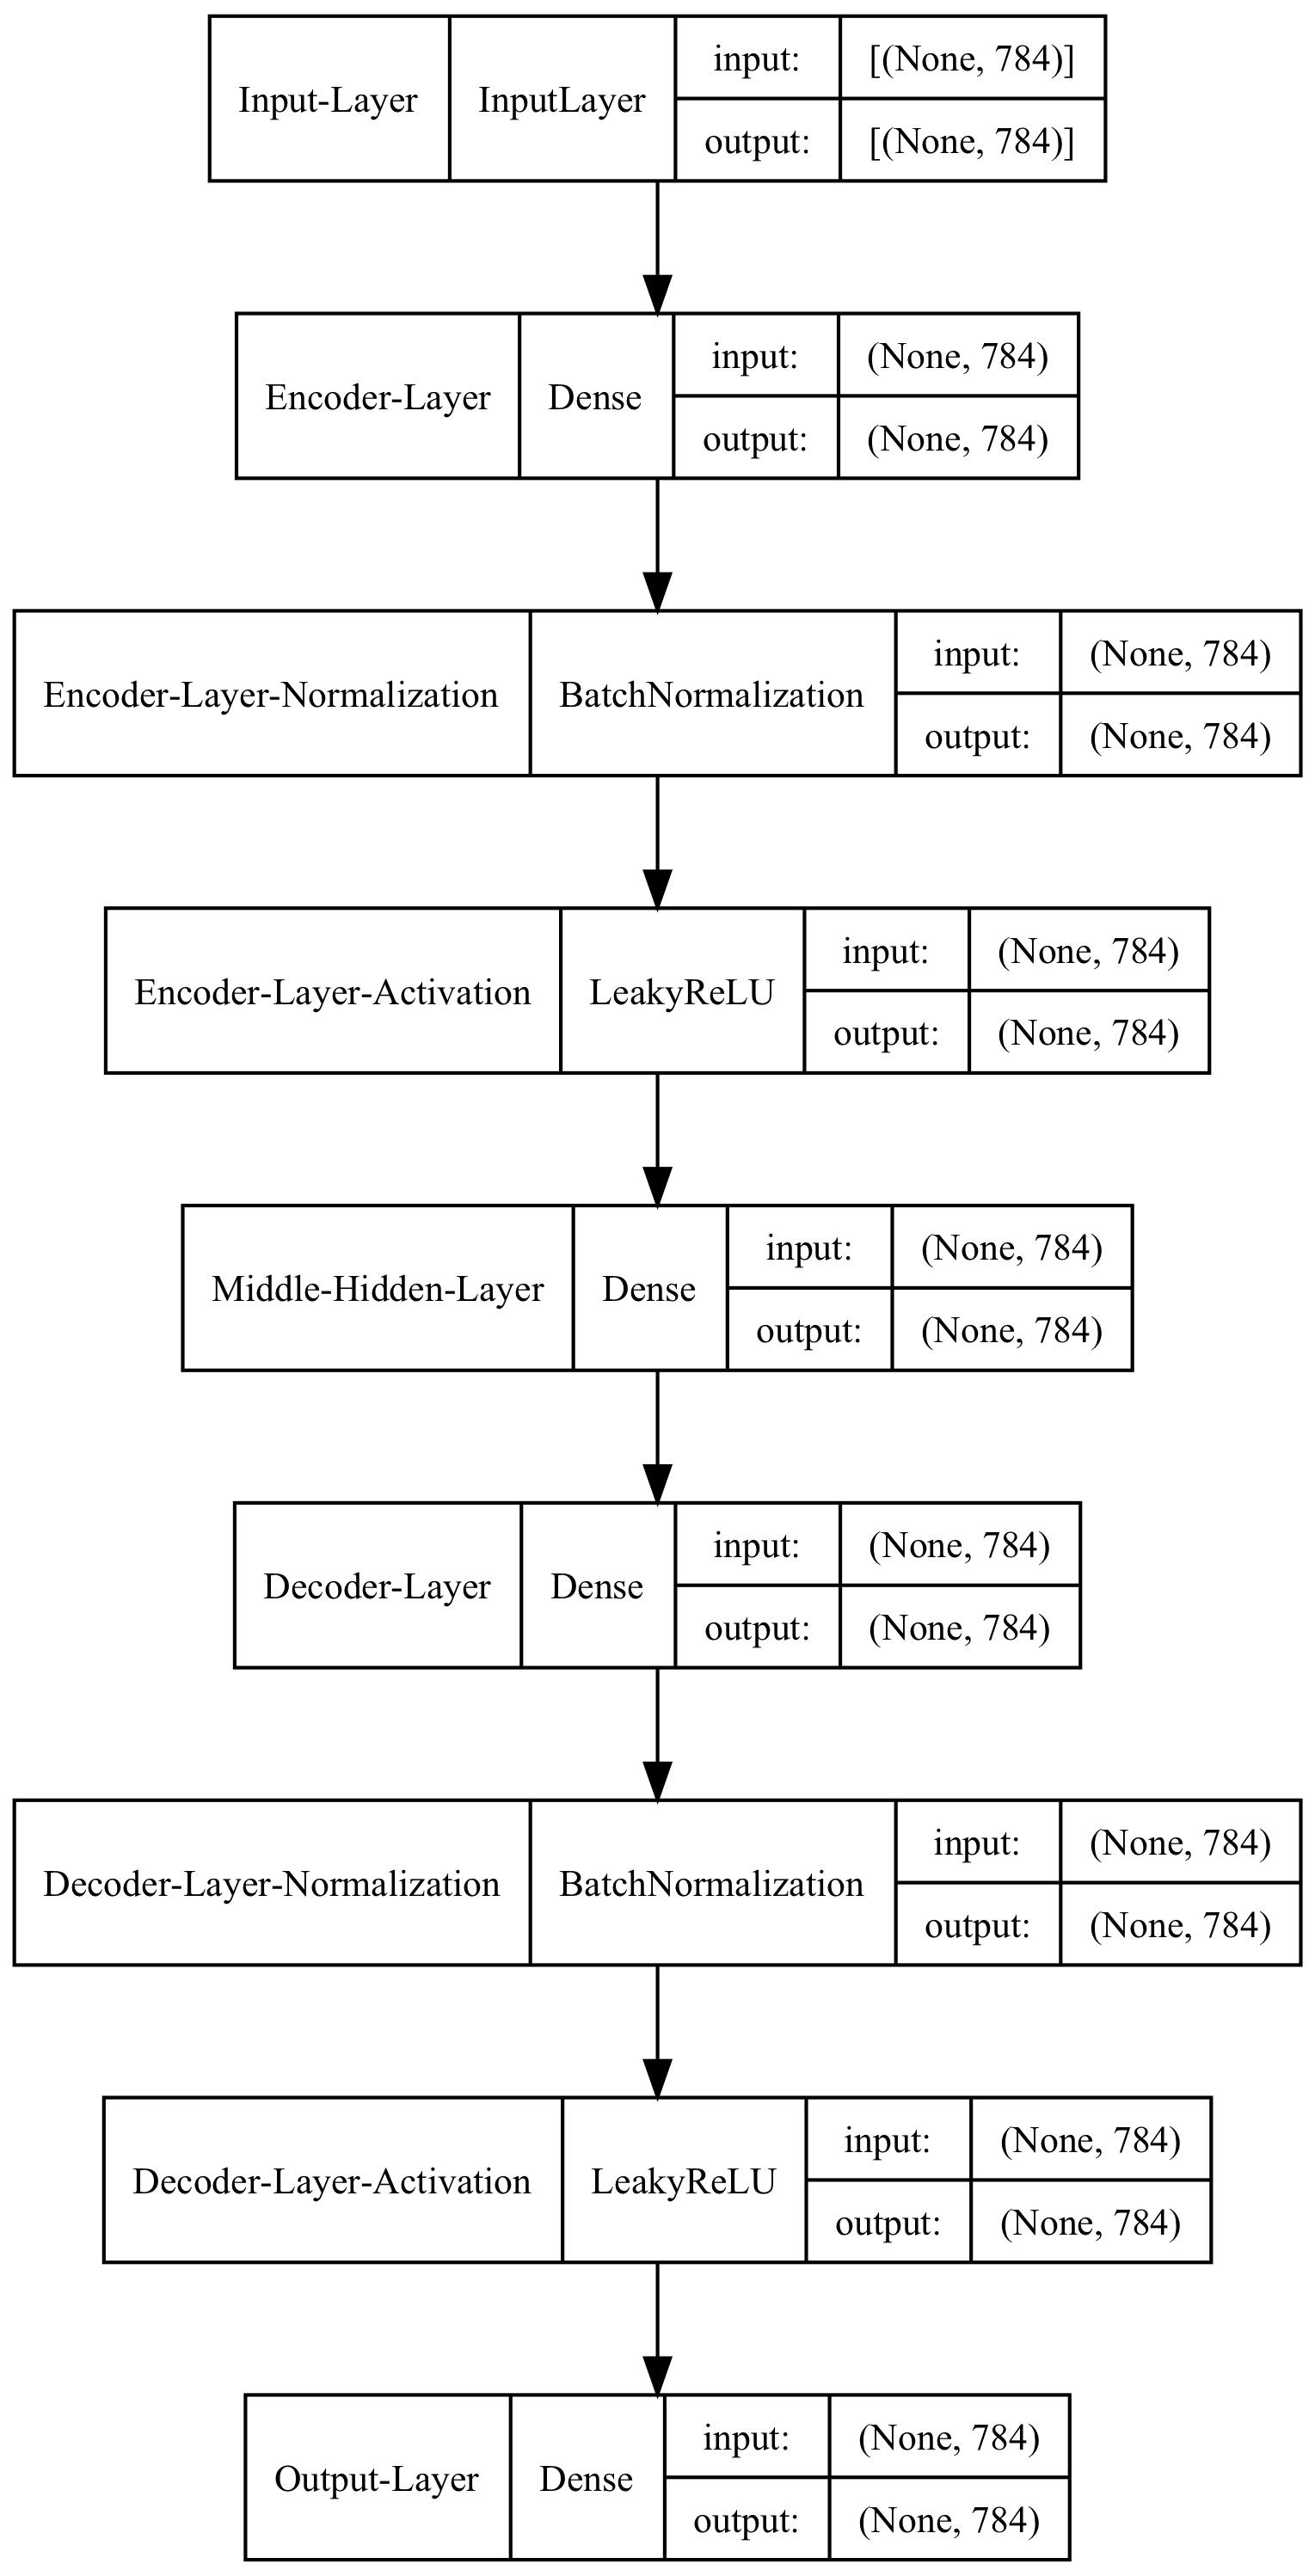

In [72]:
#--- Define Shapes
n_inputs=X_train.shape[1] # number of input neurons = the number of features X_train

#--- Input Layer 
visible = Input(shape=(n_inputs,), name='Input-Layer') # Specify input shape

#--- Encoder Layer
e = Dense(units=n_inputs, name='Encoder-Layer')(visible)
e = BatchNormalization(name='Encoder-Layer-Normalization')(e)
e = LeakyReLU(name='Encoder-Layer-Activation')(e)

#--- Middle Layer
middle = Dense(units=n_inputs, activation='linear', activity_regularizer=keras.regularizers.L1(0.0001), name='Middle-Hidden-Layer')(e)

#--- Decoder Layer
d = Dense(units=n_inputs, name='Decoder-Layer')(middle)
d = BatchNormalization(name='Decoder-Layer-Normalization')(d)
d = LeakyReLU(name='Decoder-Layer-Activation')(d)

#--- Output layer
output = Dense(units=n_inputs, activation='sigmoid', name='Output-Layer')(d)

# Define denoising autoencoder model
model = Model(inputs=visible, outputs=output, name='Denoising-Autoencoder-Model')

# Compile denoising autoencoder model
model.compile(optimizer='adam', loss='mse')

# Print model summary
print(model.summary())

# Plot the denoising autoencoder model diagram
plot_model(model, to_file=main_dir+'/pics/Denoising_Autoencoder.png', show_shapes=True, dpi=300)
#plot_model(model, show_shapes=True, dpi=300)

In [73]:
# Fit the Denoising autoencoder model to reconstruct input
history = model.fit(X_train_noisy, X_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test_noisy, X_test))


Epoch 1/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0320 - val_loss: 0.0194
Epoch 2/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0189 - val_loss: 0.0183
Epoch 3/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0162 - val_loss: 0.0192
Epoch 4/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0152 - val_loss: 0.0174
Epoch 5/20
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0147 - val_loss: 0.0184
Epoch 6/20
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0144 - val_loss: 0.0158
Epoch 7/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0141 - val_loss: 0.0158
Epoch 8/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0139 - val_loss: 0.0140
Epoch 9/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0137 - val_loss: 0.0139
Epoch 10/20
1875/1875 [==============================] - 21s 11m

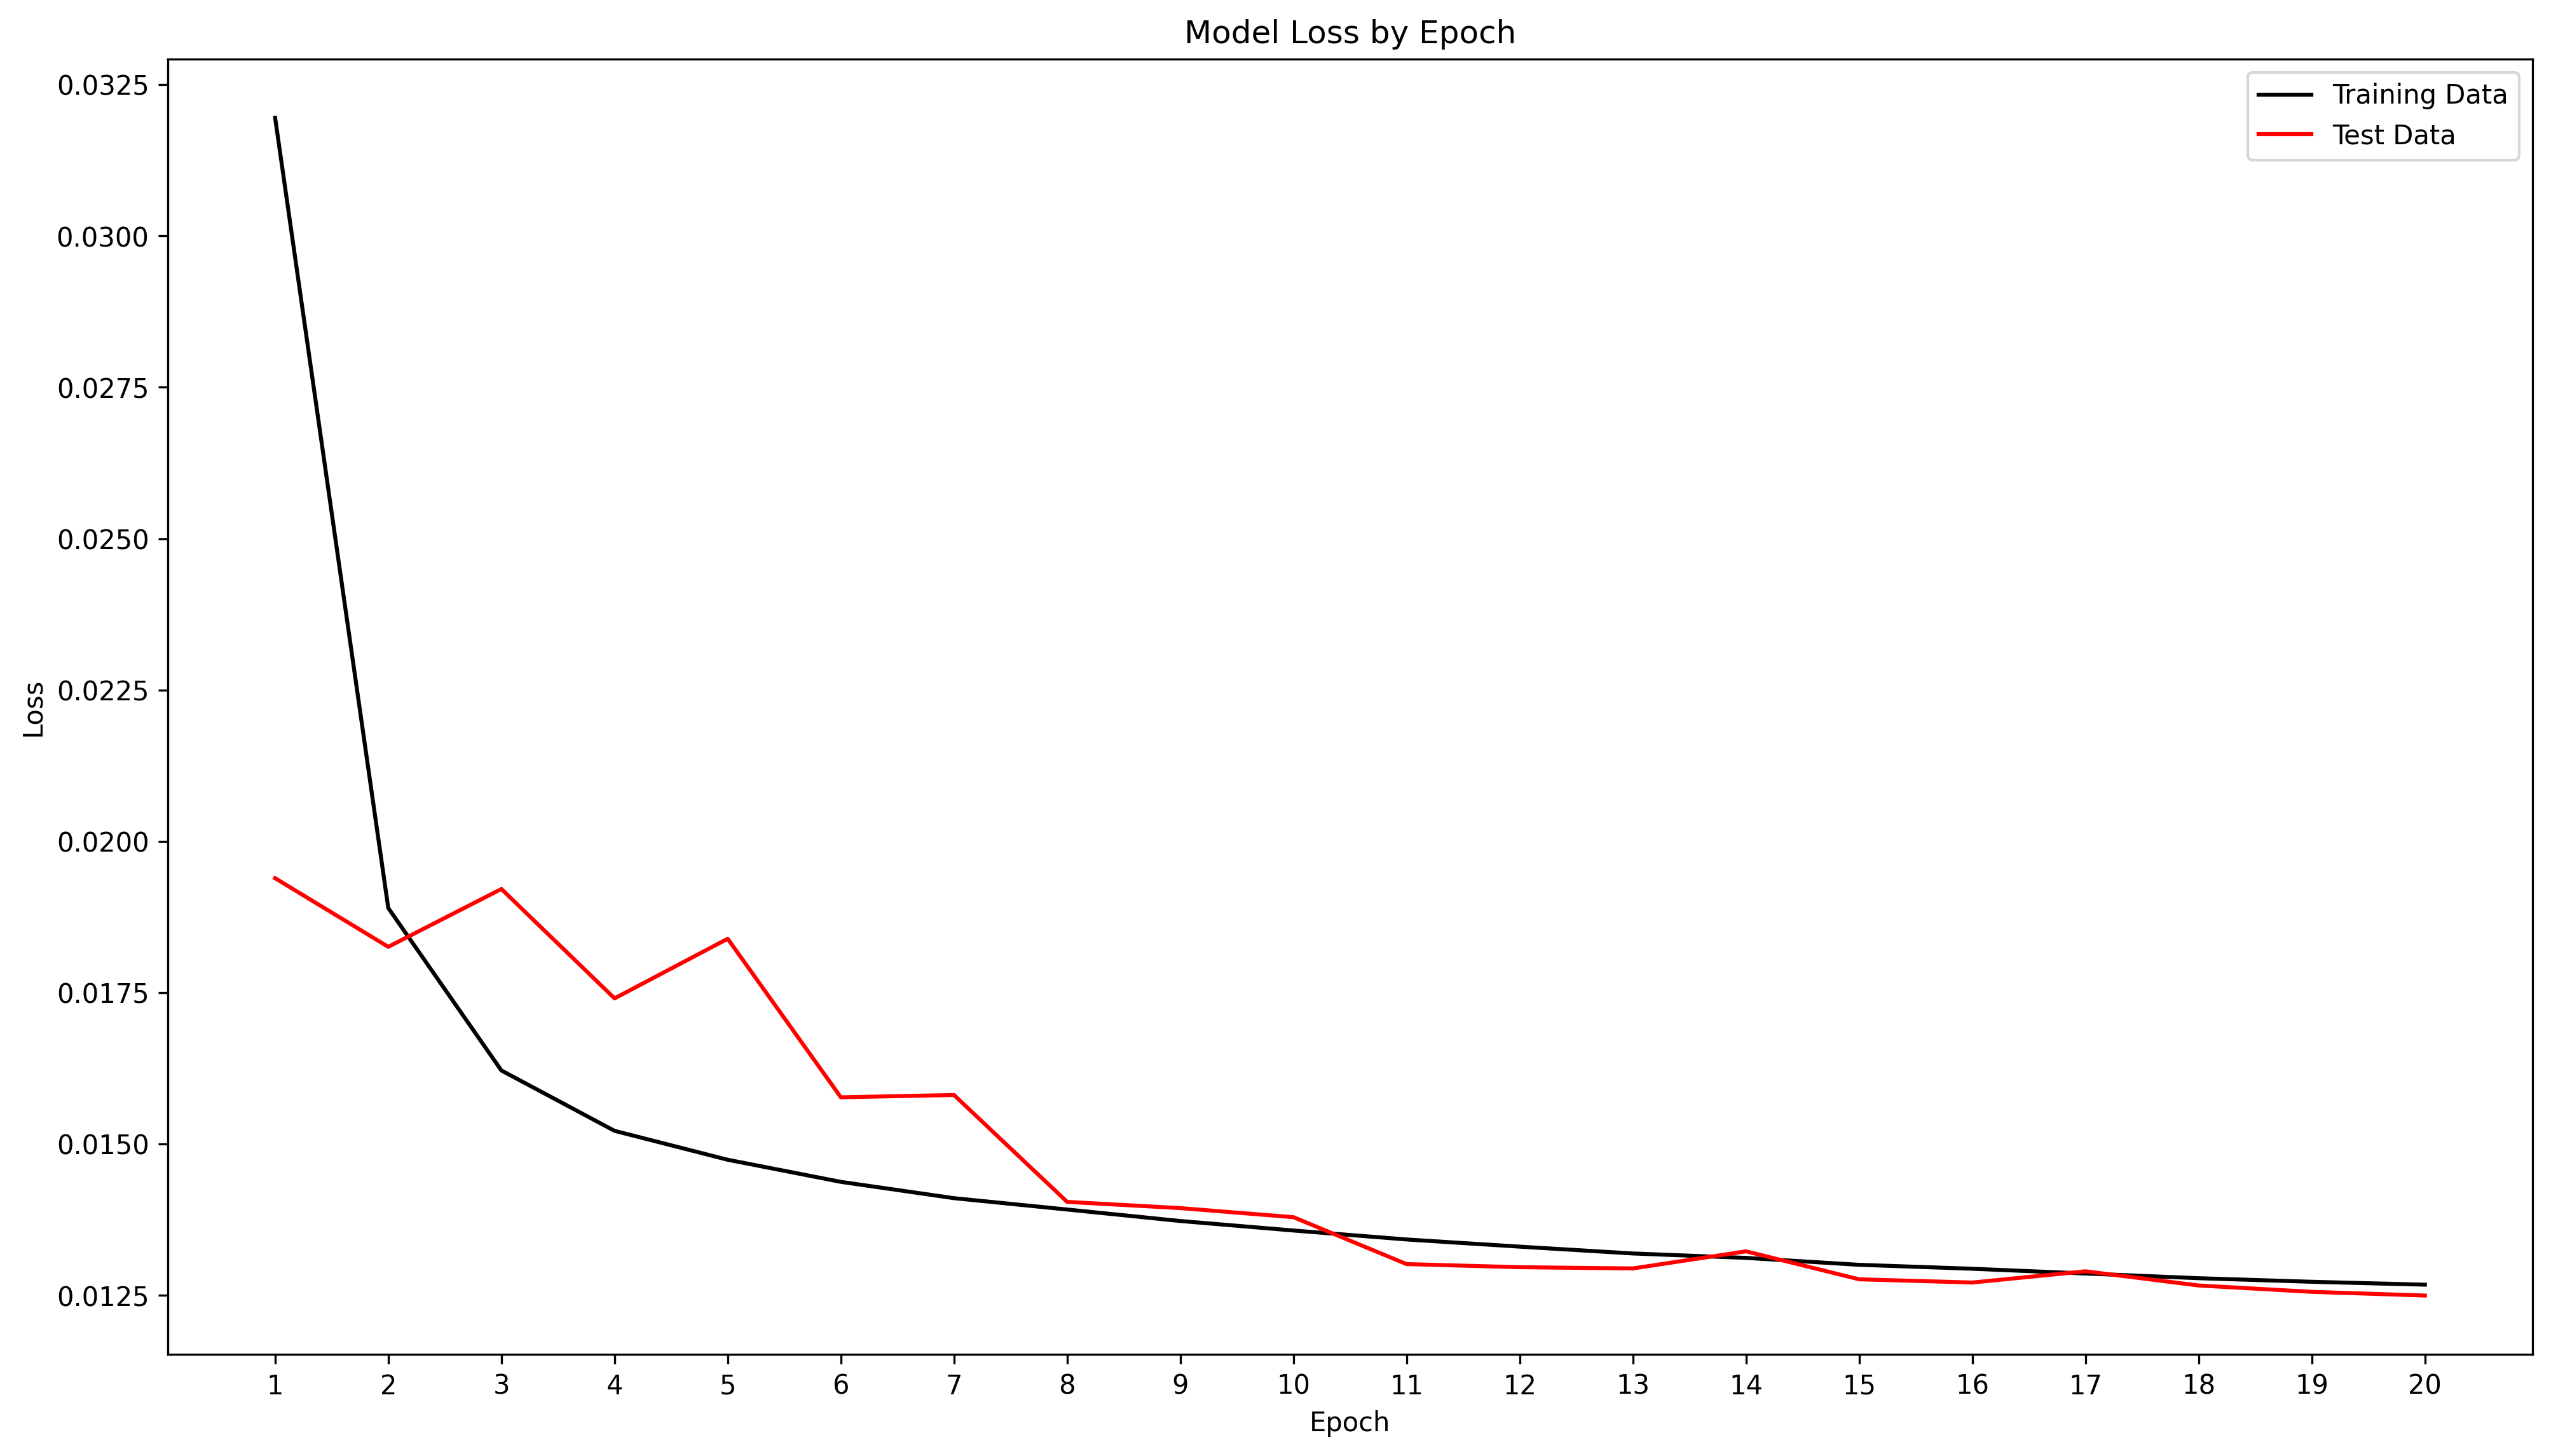

In [89]:
# Plot a loss chart
fig, ax = plt.subplots(figsize=(16,9), dpi=300)
plt.title(label='Model Loss by Epoch', loc='center')

ax.plot(history.history['loss'], label='Training Data', color='black')
ax.plot(history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.xticks(ticks=np.arange(len(history.history['loss'])), labels=np.arange(1, len(history.history['loss'])+1))
plt.legend()

plt.show()

### Step 4 - Display results based on a few images from test data

##### Original images

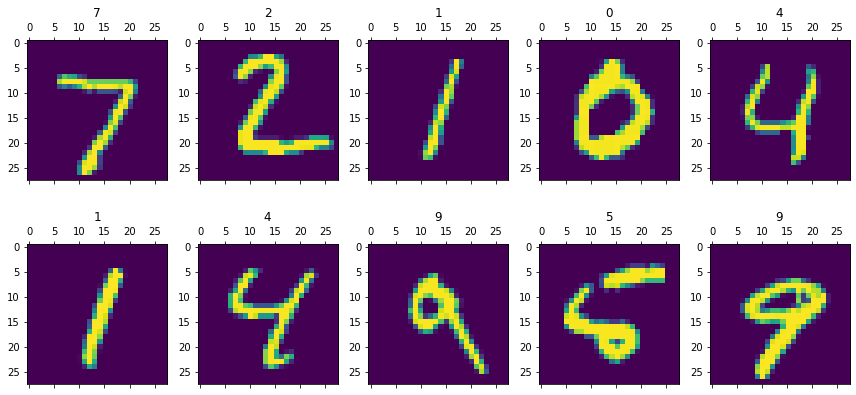

In [90]:
# Reshape back
X_test_back = X_test.reshape(10000, 28, 28)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_test_back[n])
        axs[i,j].set(title=y_test[n])
        n=n+1
plt.show() 

##### Noisy images

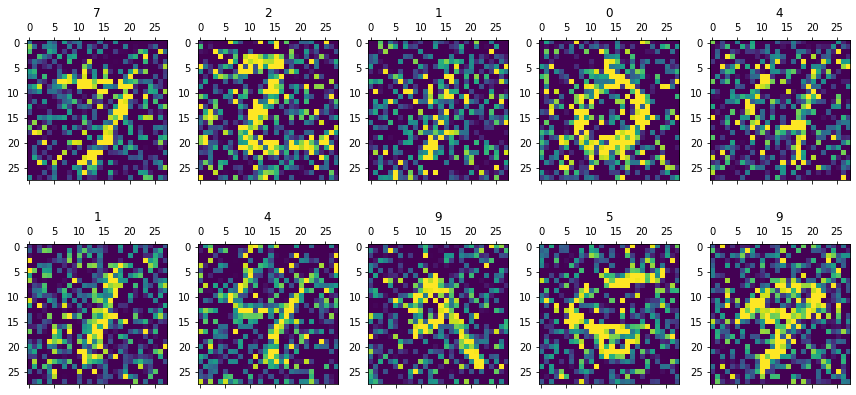

In [91]:
# Reshape back
X_test_noisy_reshaped = X_test_noisy.reshape(10000, 28, 28)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_test_noisy_reshaped[n])
        axs[i,j].set(title=y_test[n])
        n=n+1
plt.show() 

##### Images after denoising

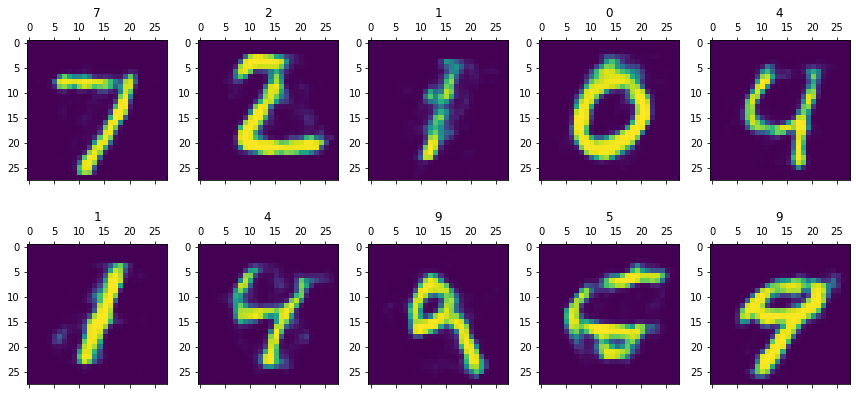

In [92]:
# Apply denoising model 
#X_train_denoised = model.predict(X_train_noisy).reshape(60000, 28, 28)
X_test_denoised = model.predict(X_test_noisy).reshape(10000, 28, 28)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_test_denoised[n])
        axs[i,j].set(title=y_test[n])
        n=n+1
plt.show() 

##### Save the denoising model so it can be retireved later if needed

In [93]:
# Save the encoder model to file
model.save(main_dir+'/data/denoiser.h5')

# End of Program